<a href="https://colab.research.google.com/github/yonilev2003/Cleaning_The_Movies_Dataset/blob/main/Cleaning_a_dataset_for_analysis_'The_Movies_Dataset'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project is about cleaning a metadata on over 45,000 movies and preparing the dataset for analysis.
[The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/code) consists of movies listed in the Full MovieLens Dataset, with movies from 1874 to 2016, 92 languages and a wide popularity spread.

Below, I celaned the dataset and made it ready for analysis using the following steps:
1. Dropping columns I found irrelevant for the analysis part.
2. Cleaned the categorical columns using extraction of the relevant values.
3. Extracting the release year to simplify the analysis.
4. Handled missing values.
5.

# Imports & Installments

In [ ]:
# Installing Kaggle API and seaborn
!pip install kaggle
! pip install seaborn

In [ ]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import ast

# Suppressing FutureWarning related to inf values
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Setting Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = 'yonathanlevy'
os.environ['KAGGLE_KEY'] = 'd161e19bbcf37f55b9e5a0d6e5497e55'

In [ ]:
# Using Kaggle API to download the dataset
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# Downloading the dataset
dataset_path = './the-movies-dataset'
api.dataset_download_files('rounakbanik/the-movies-dataset', path=dataset_path, unzip=True)

In [ ]:
# Reading the downloaded CSV files
movies_metadata_path = os.path.join(dataset_path, 'movies_metadata.csv')

# Loading the datasets into pandas DataFrames
movies = pd.read_csv(movies_metadata_path, low_memory=False)

In [ ]:
# Looking at the first 5 rows of 'movies'
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


The dataset consists of 24 columns:

* adult: Indicates if the movie is adult-rated.
* belongs_to_collection: Information about the  collection to which the movie belongs, if any.
* budget: The budget of the movie.
* genres: The genres associated with the movie.
* homepage: URL of the movie's homepage, if available.
* id: The unique identifier for the movie.
* imdb_id: The IMDB identifier for the movie.
* original_language: The language in which the movie was originally made.
* original_title: The original title of the movie.
* overview: A brief description of the movie.
* popularity: The popularity score of the movie.
* poster_path: The url of the movie's poster.
* production_companies: The production company.
* production_countries: The production country.
* release_date: The release date of the movie.
* revenue: The revenue generated by the movie.
* runtime: The runtime of the movie.
* spoken_languages: The languages spoken in the movie.
* status: The release status of the movie.
* tagline: The tagline of the movie (slogan).
* title: The title of the movie.
* video: Indicates if the entry is a video.
* vote_average: The average vote score.
* vote_count: The count of votes received.

In [ ]:
# Descriptive statistics and information about 'movies'
print(movies.describe())
print(movies.info())

            revenue       runtime  vote_average    vote_count
count  4.546000e+04  45203.000000  45460.000000  45460.000000
mean   1.120935e+07     94.128199      5.618207    109.897338
std    6.433225e+07     38.407810      1.924216    491.310374
min    0.000000e+00      0.000000      0.000000      0.000000
25%    0.000000e+00     85.000000      5.000000      3.000000
50%    0.000000e+00     95.000000      6.000000     10.000000
75%    0.000000e+00    107.000000      6.800000     34.000000
max    2.787965e+09   1256.000000     10.000000  14075.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage        

# Basic Cleaning

**Dropping irrelevant columns**

I decided to drop 'adult', 'video', 'homepage', 'tagline', 'overview', 'poster_path', 'status', 'original_title', 'title' and 'imdb_id'. I found those columns irrelevant for a recommendation system based on one chosen movie. Furthermore, the model is based on the characterism of the movie, rather than the audience (the column 'adult') or textual descriptions ('overview' and 'title'). Also, 'imdb_id' is irrelevant because I already have 'id'.

In [ ]:
# Dropping 'adult', 'video', 'homepage', 'tagline', 'overview', 'poster_path', 'status', 'original_title' and 'title'
movies.drop(columns=['adult', 'video', 'homepage', 'tagline', 'overview',
                     'poster_path', 'status', 'original_title', 'title', 'imdb_id'], inplace=True)

**Cleaning categorical columns**

I made a function called "parse_json_column" to parse the json-like columns - 'genres', 'production_countries', 'production_companies', 'spoken_languages' and 'belongs_to_collection'.

In [ ]:
# Parsing through json-like columns
def parse_json_column(df, columns):
    def extract_name_from_json(json_str, key='name', is_collection=False):
        if pd.isna(json_str):
            return "Unknown" if is_collection else ""
        try:
            json_data = json.loads(json_str.replace("'", "\""))
            if isinstance(json_data, dict):
                return json_data[key]
            elif isinstance(json_data, list):
                return ', '.join([d[key] for d in json_data if key in d])
        except json.JSONDecodeError:
            return "Unknown" if is_collection else ""

    df_copy = df.copy()

    for col in columns:
        is_collection = col == 'belongs_to_collection'
        df_copy[col] = df_copy[col].apply(lambda x: extract_name_from_json(x, is_collection=is_collection))

    return df_copy

# Defining the columns to apply the function
columns_to_parse = ['genres', 'production_countries', 'production_companies', 'spoken_languages', 'belongs_to_collection']

# Applying the function to the dataset
movies = parse_json_column(movies, columns_to_parse)

# Checking the parsing was correct
movies.head()[['genres', 'production_countries', 'production_companies', 'spoken_languages', 'belongs_to_collection']]

,genres,production_countries,production_companies,spoken_languages,belongs_to_collection
0,"Animation, Comedy, Family",United States of America,Pixar Animation Studios,English,Toy Story Collection
1,"Adventure, Fantasy, Family",United States of America,"TriStar Pictures, Teitler Film, Interscope Com...","English, Français",Unknown
2,"Romance, Comedy",United States of America,"Warner Bros., Lancaster Gate",English,Grumpy Old Men Collection
3,"Comedy, Drama, Romance",United States of America,Twentieth Century Fox Film Corporation,English,Unknown
4,Comedy,United States of America,"Sandollar Productions, Touchstone Pictures",English,Father of the Bride Collection


**Converting 'budget' and 'popularity' to numeric**

I converted 'budget' and 'popularity' to numeric to understand the distributions of all the numerical columns. Also, I re-did the descriptive statistics.

In [ ]:
# Converting 'budget' and 'popularity' to numeric
movies[['budget', 'popularity']] = movies[['budget', 'popularity']].apply(pd.to_numeric, errors='coerce')

# Re-doing the descriptive statistics
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,2.921478,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,6.005414,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.385948,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,1.127685,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,3.678902,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


Before I looked into the distributions of the data, when running the code for the first time, a 'FutureWarning' was raised, indicating for finding infinit values treated as NaN in the dataset. I removed this warning in the 'importing' section.

**The numerical distributions:**

* 'budget': more than 75% of the movies seem do miss the budget, I decided to drop the column.
'revenue': like 'budget', more than 75% of the movies seem do miss a revenue value. I decided to drop this column as well.
* 'popularity': this column is right-skewed, with a few movies having very high popularity scores and the majority having low scores. This might occur when some movies have significant more votings or voters. Because I'm not sure for the metric used in this column, I decided to drop this column as well, and later use the IMDB formula to create my own metric for popularity. To clarify, off the project I compared the IMDB formula vs the 'popularity' column and saw different results.
* 'runtime': movie runtimes are less skewed compared to 'budget', 'revenue', and 'popularity'. The data appears to be more normally distributed, with a concentration of values around the median. However, there are outliers with significantly longer runtimes. Below the distributions of the numerical columns, I checked how many movies have runtimes of more than 120 and 180 minutes. About 10% of the movies and 1% of the movies are 120 and 180 minutes long, respectively.
* 'vote_average' & 'vote_count': later in the feature engineering, I made a new column called "voting" made by combining the two features using the IMDB formula.

In the case of 'popularity', because of the vast spread of movie popularity (caused because many movies are extremely popular), I decided to log-transform the column. Later, I standardized the data as well because of the skeweness of the column's values.

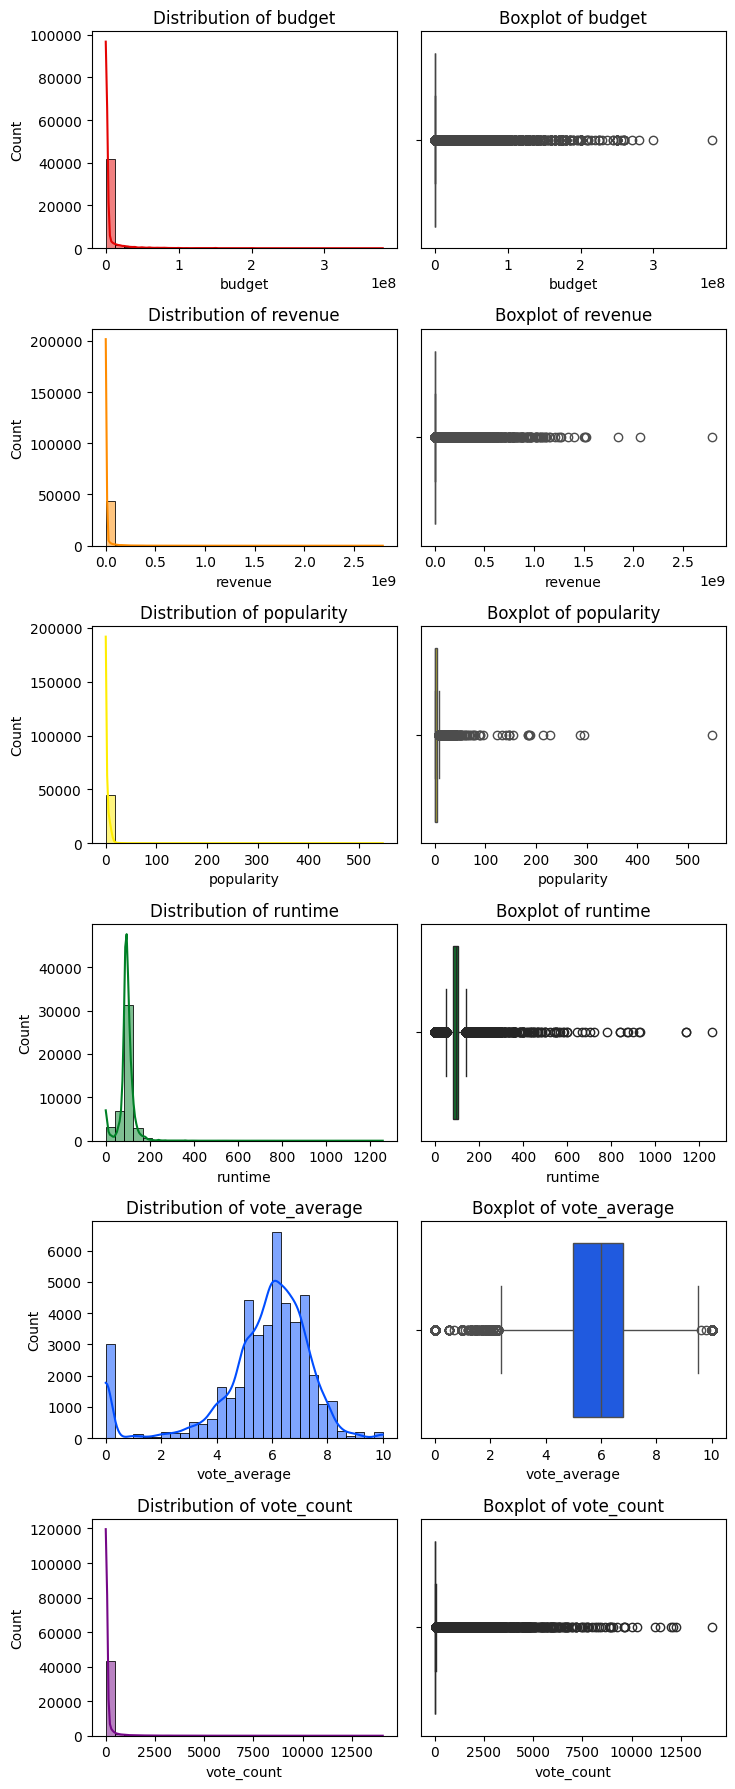

In [ ]:
# Looking at the numerical distributions
# Defining the distributions colors
distributions_palette = [
    "#e40303",
    "#ff8c00",
    "#ffed00",
    "#008026",
    "#004dff",
    "#750787"
]

# Plotting the distributions and boxplots
numerical_columns = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(7.5, 3*len(numerical_columns)))
for i, column in enumerate(numerical_columns):
    sns.histplot(movies[column], kde=True, bins=30, ax=axes[i, 0], color=distributions_palette[i % len(distributions_palette)])
    axes[i, 0].set_title(f'Distribution of {column}')
    sns.boxplot(x=movies[column], ax=axes[i, 1], color=distributions_palette[i % len(distributions_palette)])
    axes[i, 1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [ ]:
# Counting how many movies have runtimes longer than 120 and 180 minutes, respectively
movies_longer_than_120 = len(movies[movies['runtime'] > 120])
movies_longer_than_180 = len(movies[movies['runtime'] > 180])
print("There are", movies_longer_than_120, "movies with a runtime longer than 120 minutes.")
print("There are", movies_longer_than_180, "movies with a runtime longer than 180 minutes.")

There are 5009 movies with a runtime longer than 120 minutes.
There are 517 movies with a runtime longer than 180 minutes.


In [ ]:
# Dropping 'budget' and 'revenue' due to "hidden" missing values
movies.drop(['budget', 'revenue'], axis=1, inplace=True)

In [ ]:
# Dropping 'popularity' due to the unclarity in metrics
movies.drop(['popularity'], axis=1, inplace=True)

To simplify the model, I converted the 'release_date' column to datetime and extracted the year. Then, I converted again the column to numeric and dropped 'release_date'.

In [ ]:
# Converting 'release_date' column to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce', format='%Y-%m-%d')

# Dropping NaN values from 'release_date'
movies.dropna(subset=['release_date'], inplace=True)

# Extracting the year and convert to numeric
# Using 'loc' to ensure the operation is done on the original DataFrame
movies.loc[:, 'release_year'] = movies['release_date'].dt.year.astype(int)

# Looking at the first 5 rows of the 'release_year' column
print(movies['release_year'].head())

# Dropping 'release_date' column
movies.drop(columns='release_date', inplace=True)

0    1995
1    1995
2    1995
3    1995
4    1995
Name: release_year, dtype: int64


**Handling the remaining mising values**

Most missing values are already handled with. There are 11 missing values in the 'original_languages' and 246 in 'runtime'. I dropped the rows with the missing original languages and imputed with the median for the missing runtimes.

In [ ]:
# How many missing values
movies.isnull().sum()

belongs_to_collection      0
genres                     0
id                         0
original_language         11
production_companies       0
production_countries       0
runtime                  246
spoken_languages           0
vote_average               0
vote_count                 0
release_year               0
dtype: int64

In [ ]:
# Dropping rows with the missing original languages
movies.drop(columns=['original_language'], inplace=True)

# Imputing with the median for the missing runtimes
median_runtime = movies['runtime'].median()
movies['runtime'].fillna(median_runtime, inplace=True)

**The categorical distributions**

I wanted to see the distributions of the categorical columns to better understand the cardinality. Because of the high computational costs that come with the cardinality, I decided to impute each value not in the top 10 most frequent values as "other". That's except for 'belongs_to_collection' column, because I found it important to understand every collection if there is one.

belongs_to_collection has 1079 unique values.


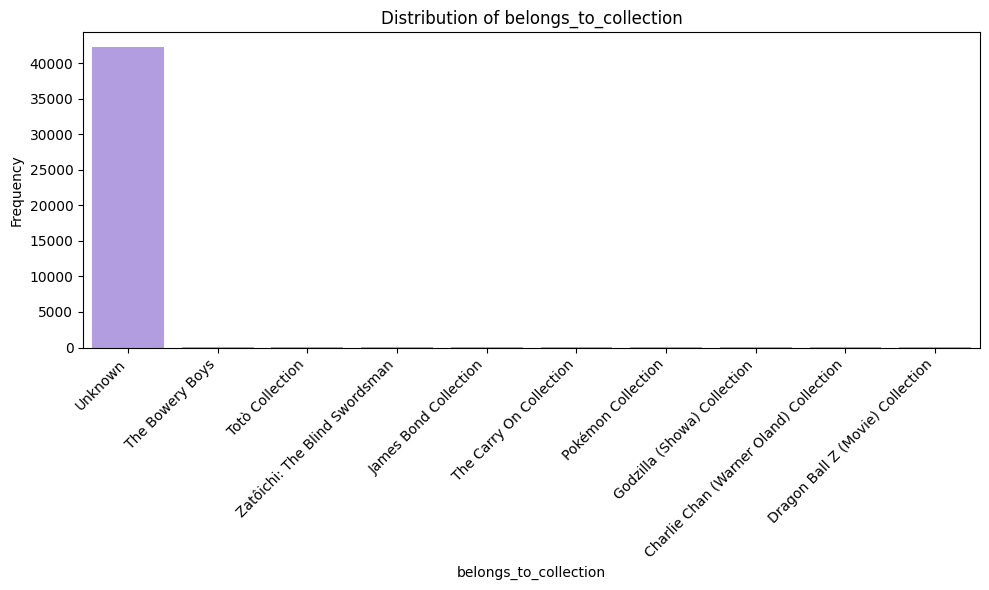

genres has 4065 unique values.


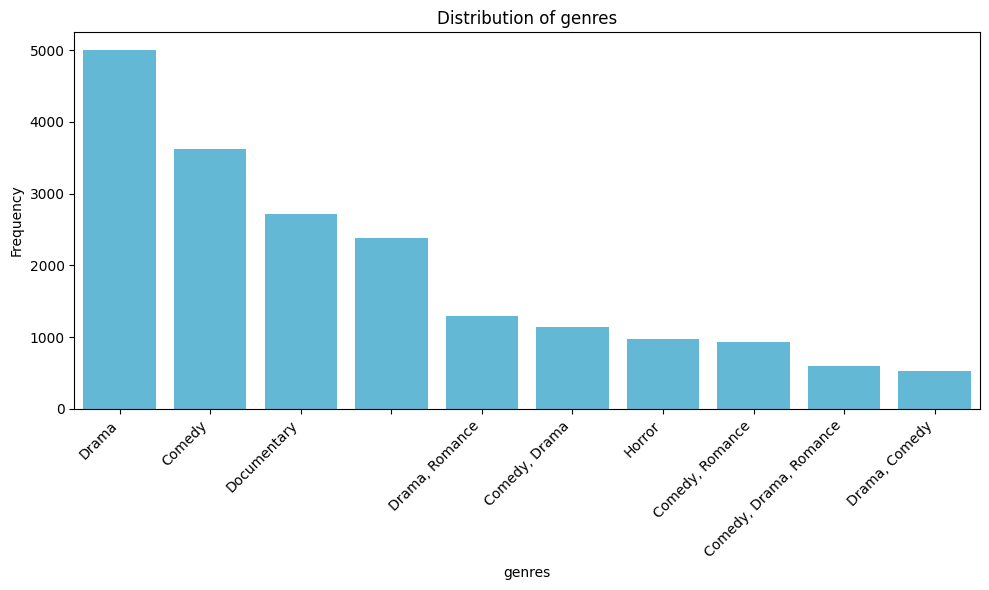

production_companies has 22247 unique values.


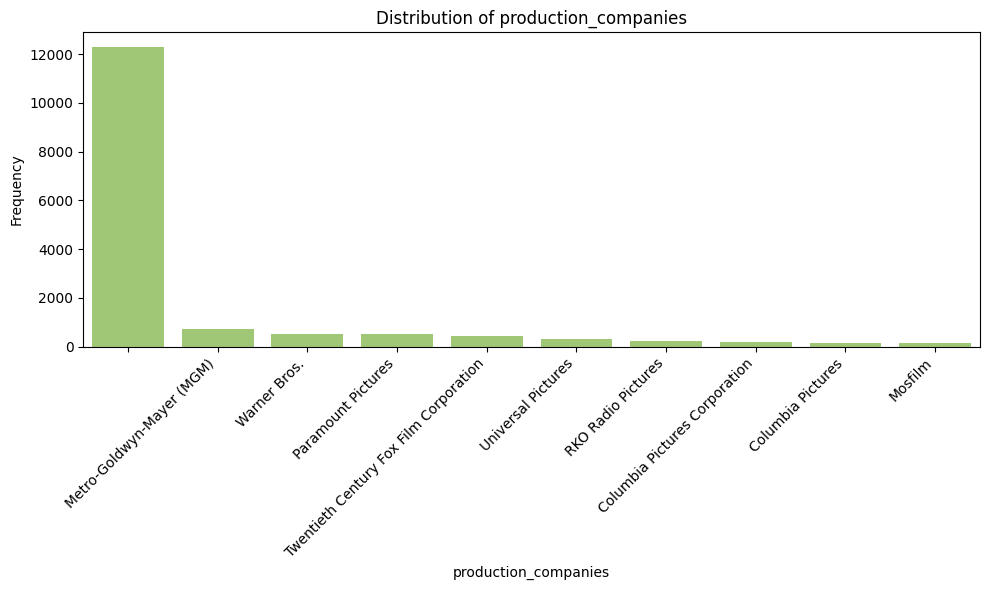

production_countries has 2384 unique values.


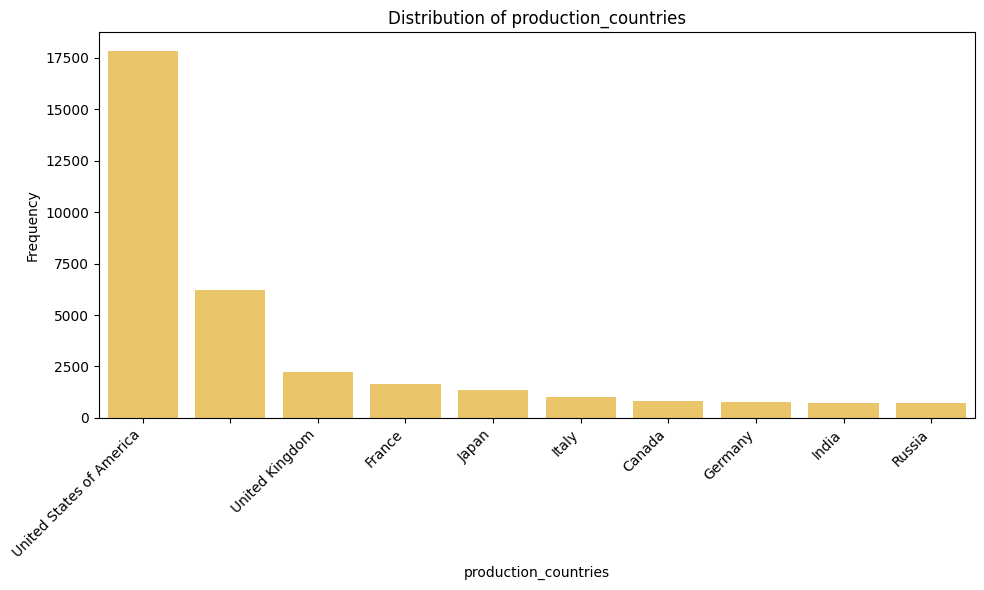

spoken_languages has 1828 unique values.


<ipython-input-43-2c08f972099c>:39: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
<ipython-input-43-2c08f972099c>:39: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  plt.tight_layout()
<ipython-input-43-2c08f972099c>:39: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_

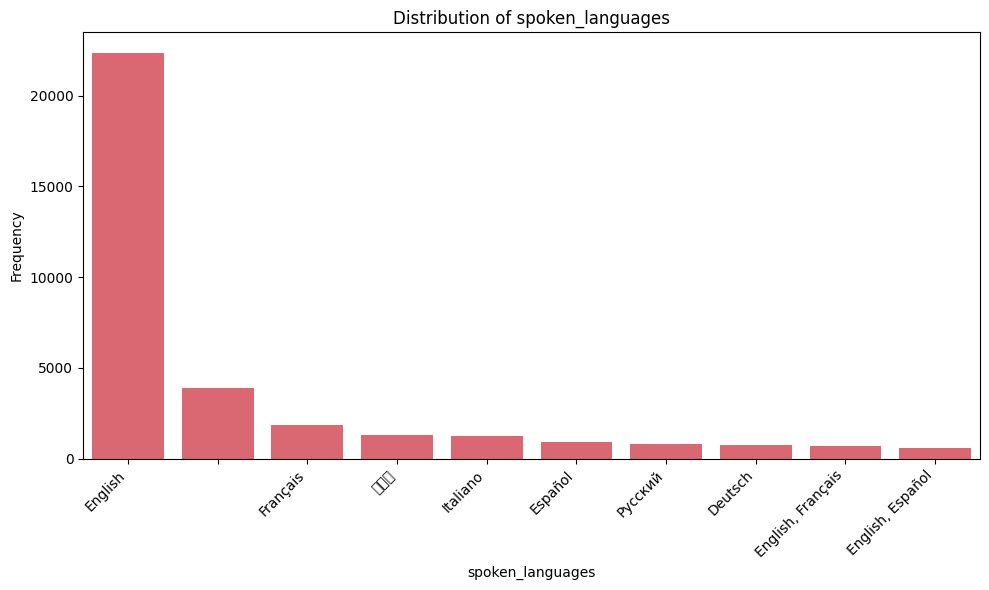

In [ ]:
# Defining the categorical values
categorical_columns = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']

# Define the color palette for distribution plots
distributions_palette = [
    "#AC92EB",
    "#4FC1E8",
    "#A0D568",
    "#FFCE54",
    "#ED5564",
]

# Loop through each categorical column
for i, col in enumerate(categorical_columns):
    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))

    # Check if the column contains lists of categories and flatten if necessary
    if movies[col].dtype == 'object' or movies[col].dtype == 'str':
        all_categories = movies[col].explode()
    else:
        all_categories = movies[col]

    # Count the number of unique values
    unique_values_count = all_categories.nunique()
    print(f"{col} has {unique_values_count} unique values.")

    # Plot the distribution of categories using a specific color from the palette
    # Cycle through the color palette if there are more columns than colors
    ax = sns.countplot(x=all_categories,
                       order=all_categories.value_counts().iloc[:10].index,  # Top 10 categories
                       color=distributions_palette[i % len(distributions_palette)])  # Cycle through colors
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

    # Show plot
    plt.tight_layout()
    plt.show()

In [ ]:
# Defining the threshold as top 10
#top_categories_threshold = 10

# Looping through each categorical column, except for 'belongs_to_collection'.
#for col in categorical_columns:
  #  if col == 'belongs_to_collection':
 #       continue

    # Determining the top categories based on frequency
   # top_categories = movies[col].explode().value_counts().nlargest(top_categories_threshold).index

    # Imputing as 'Other' if the category is not in the top categories
    #movies[col] = movies[col].apply(lambda x: [i if i in top_categories else 'Other' for i in x])

# Preparing for ML

**Feature engineering - 'Voting' column**

I used the IMDB formula to create a new feature replacing the 'popularity' column. Where:

* v is the number of votes for the movie
* m is the minimum votes required to be listed in the chart
* R is the average rating of the movie
* C is the mean vote across the whole report

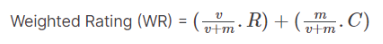


In [ ]:
# Making a new column called 'voting' consisting of weighted rating of 'vote_count' and 'vote_average'
# Calculating C (the mean vote of all movies)
C = movies['vote_average'].mean()

# Calculating m (the minimum votes required to be listed
m = 1

# Defining the weighted_rating function using the IMDB formula
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v / (v + m) * R) + (m / (m + v) * C)

# Applying the function to calculate the weighted rating for each movie
movies['voting'] = movies.apply(weighted_rating, axis=1)

# Displaying the new 'voting' column along with 'vote_average' and 'vote_count' for comparison
print(movies[['vote_average', 'vote_count', 'voting']].head())
print(movies[['voting']].max())
print(movies[['voting']].min())

# Dropping 'vote_average' and 'vote_count'
movies.drop(columns=['vote_average', 'vote_count'], inplace=True)

   vote_average  vote_count    voting
0           7.7      5415.0  7.699617
1           6.9      2413.0  6.899471
2           6.5        92.0  6.490581
3           6.1        34.0  6.086402
4           5.7       173.0  5.699564
voting    9.424001
dtype: float64
voting    0.095323
dtype: float64


In [ ]:
# Checking if there are null values in the new 'rating' column
movies['voting'].isnull().sum()

0

**Standardizing the numerical data and encoding categorical data**

I standardized the numerical columns - 'runtime', 'release_year' and 'voting'.

The encoding of the categorical data was challenging because of the high cardinality.
After encoding the categorical columns, the shape of the dataset "rose" from 10 columns to about 74,000. The reasons for that:
1. The high cardinality "pushed" for creating many columns.
2. I used sparse matrix, which is a decent strategy for handling high-dimensional encoded data in terms of memory. However, when converting back to a regular dataframe for operations, this can reveal the acutual dimensionality.

Next, I'll use dimensionality reduction and feature importance to reduce the number of dimensions.

In [ ]:
# Defining the numerical columns
numerical_columns = ['runtime', 'voting', 'release_year']

# Initializing the StandardScaler
scaler = StandardScaler()

# Standardizing the numerical columns
movies[numerical_columns] = scaler.fit_transform(movies[numerical_columns])

# Checking out the first few rows to verify standardization
movies[numerical_columns].head()

,runtime,voting,release_year
0,-0.344856,1.728604,0.129653
1,0.256662,0.936298,0.129653
2,0.178203,0.531414,0.129653
3,0.858180,0.131194,0.129653
4,0.308968,-0.251855,0.129653


In [ ]:
# Encoding categorical columns
# Defining a function to convert column values to lists, specifically handling non-string and non-iterable inputs
def convert_to_list(value):
    # Directly converting non-list values to a list containing a single string representation of the value
    if not isinstance(value, list):
        return [str(value)]
    # For list values, ensuring each item is converted to string
    return [str(item) for item in value]

# Defining the categorical columns to be encoded
categorical_columns = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']

# Applying the conversion function to each categorical column
for col in categorical_columns:
    movies[col] = movies[col].apply(convert_to_list)

# Encode each categorical column and append the result directly to 'movies'
for col in categorical_columns:
    # Initialize MultiLabelBinarizer
    mlb = MultiLabelBinarizer(sparse_output=True)
    # Fit and transform the data for the column
    encoded_data = mlb.fit_transform(movies[col])
    # Generate new column names for the encoded data
    encoded_cols = [f"{col}_{c}" for c in mlb.classes_]
    # Convert the sparse matrix to a DataFrame and concatenate it with 'movies'
    encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=encoded_cols, index=movies.index)
    movies = pd.concat([movies, encoded_df], axis=1)

# Now that encoding is complete, remove the original categorical columns from 'movies'
movies.drop(categorical_columns, axis=1, inplace=True)

# At this point, 'movies' has been updated with the new encoded columns, and the original columns have been removed
# Display the first few rows of the updated 'movies' DataFrame to verify the changes
print(movies.head())

      id   runtime  release_year    voting  \
0    862 -0.344856      0.129653  1.728604   
1   8844  0.256662      0.129653  0.936298   
2  15602  0.178203      0.129653  0.531414   
3  31357  0.858180      0.129653  0.131194   
4  11862  0.308968      0.129653 -0.251855   

   belongs_to_collection_... Has Fallen Collection  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   belongs_to_collection_00 Schneider Filmreihe  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   belongs_to_collection_100 Girls Collection  \
0                                         

**Creating the item-feature matrix**

In [ ]:
# Defining the target variable
X = movies.drop(['id'], axis=1)
y = movies['id']

# Pivoting the dataframe to create the item-feature matrix
item_feature_matrix = movies.pivot_table(index='id', columns=y, values=movies)


# Recommendation System - Cr


1. PCA + interactive visualization
use: MaxAbsScaler + from sklearn.decomposition import TruncatedSVD
2. knn (use lasso if needed) + interactive visualization
3. use "predict"
include cosine similarity

**Features correlation using correlation matrix**

**Dimensionality Reduction Using PCA**